In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read and load data
df = pd.read_csv("hotel_bookings.csv")

#display data
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
#do data cleaning

#check missing value
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [5]:
#check duplicate values
df.duplicated().any()


True

In [6]:
#drop duplicate entries
df = df.drop_duplicates(inplace=False)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87392 non-null  float64
 11  babies                          87396 non-null  int64  
 12  meal                           

In [8]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87392.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,75203.000000,5259.000000,87396.000000,87396.000000,87396.000000,87396.000000
mean,0.274898,79.891368,2016.210296,26.838334,15.815541,1.005263,2.625395,1.875795,0.138640,0.010824,0.039075,0.030413,0.183990,0.271603,94.138306,183.081384,0.749565,106.337246,0.084226,0.698567
std,0.446466,86.052325,0.686102,13.674572,8.835146,1.031921,2.053584,0.626500,0.455881,0.113597,0.193775,0.369145,1.731894,0.727245,113.188172,130.557608,10.015731,55.013953,0.281533,0.831946
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,47.000000,0.000000,72.000000,0.000000,0.000000
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,169.000000,0.000000,98.100000,0.000000,0.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,263.000000,0.000000,134.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [9]:
#drop 'company' column since it has lot of missing data
df = df.drop(columns =['company'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87392 non-null  float64
 11  babies                          87396 non-null  int64  
 12  meal                           

In [11]:
#impute missing values
df.fillna(0, inplace=True)

In [12]:
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

All the missing values have been imputed. Now, we want to drop insignificant features before starting to build the model.


## Feature Selection

- To **reduce input variables** and get rid of the noise in data.
- Benefits of feature selection:
1. Reduces overfitting
2. Improves model's predictions
3. Reduces computation time
4. Smaller number of features will make the model more interpretable
- Several techniques for feature selection such as:

1. **Wrapper methods** (forward, backward, stepwise function)
2. **Filter methods** (ANOVA, Pearson correlation, variance thresholding)
3. **Embedded methods** (Lasso, Ridge, Decision Tree)

In here, we are interested to implement **Pearson correlation** by plotting heatmap to observe all the correlations with the predictor variable, Y. Since we want to predict booking cancellation, the column *is_canceled* is the predictor variable, Y.


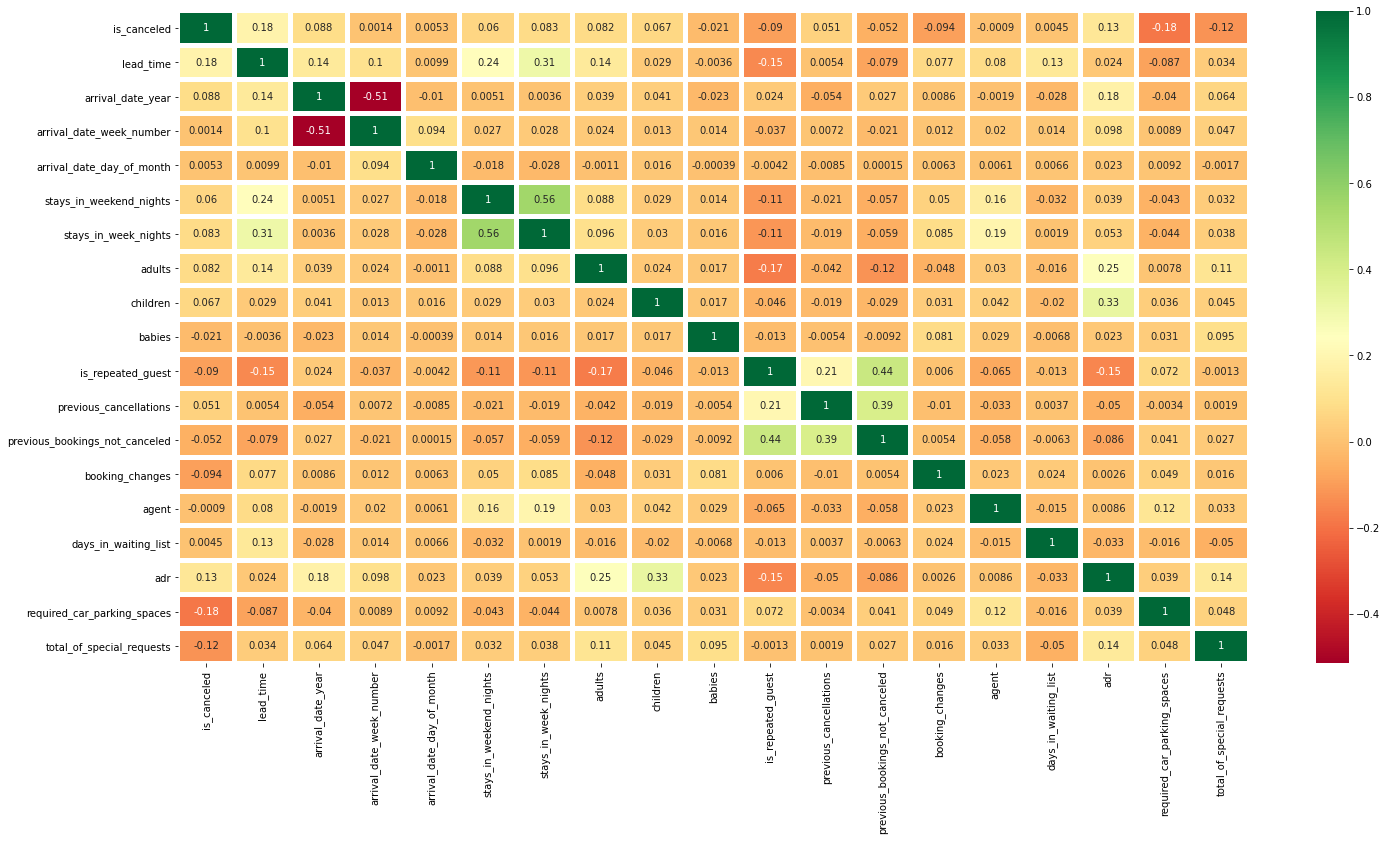

In [13]:
plt.figure(figsize=(24,12))
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=4) 
fig=plt.gcf()
plt.show()

In [20]:
# target = abs(df.corr()["is_canceled"].sort_values(ascending = True))
target = (df.corr()["is_canceled"].sort_values(ascending = True))
print(target)


required_car_parking_spaces      -0.184206
total_of_special_requests        -0.120545
booking_changes                  -0.093644
is_repeated_guest                -0.089643
previous_bookings_not_canceled   -0.052154
babies                           -0.020543
agent                            -0.000900
arrival_date_week_number          0.001443
days_in_waiting_list              0.004464
arrival_date_day_of_month         0.005328
previous_cancellations            0.051468
stays_in_weekend_nights           0.060191
children                          0.067369
adults                            0.081816
stays_in_week_nights              0.082928
arrival_date_year                 0.088030
adr                               0.127986
lead_time                         0.184806
is_canceled                       1.000000
Name: is_canceled, dtype: float64


- From the result, booking cancellation (*is_canceled*) shows strong positive correlation with *adr* and *lead_time*.

In [21]:
list(df.head())

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date']

In [22]:
unwanted_col = ['arrival_date_year','arrival_date_week_number','arrival_date_day_of_month',
               'stays_in_weekend_nights','stays_in_week_nights','assigned_room_type','booking_changes',
                'days_in_waiting_list','reservation_status','arrival_date_month', 'reservation_status_date','country']

df.drop(unwanted_col, axis=1, inplace=True)


In [23]:
df.head()

,hotel,is_canceled,lead_time,adults,children,babies,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,deposit_type,agent,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,342,2,0.0,0,BB,Direct,Direct,0,0,0,C,No Deposit,0.0,Transient,0.0,0,0
1,Resort Hotel,0,737,2,0.0,0,BB,Direct,Direct,0,0,0,C,No Deposit,0.0,Transient,0.0,0,0
2,Resort Hotel,0,7,1,0.0,0,BB,Direct,Direct,0,0,0,A,No Deposit,0.0,Transient,75.0,0,0
3,Resort Hotel,0,13,1,0.0,0,BB,Corporate,Corporate,0,0,0,A,No Deposit,304.0,Transient,75.0,0,0
4,Resort Hotel,0,14,2,0.0,0,BB,Online TA,TA/TO,0,0,0,A,No Deposit,240.0,Transient,98.0,0,1


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   adults                          87396 non-null  int64  
 4   children                        87396 non-null  float64
 5   babies                          87396 non-null  int64  
 6   meal                            87396 non-null  object 
 7   market_segment                  87396 non-null  object 
 8   distribution_channel            87396 non-null  object 
 9   is_repeated_guest               87396 non-null  int64  
 10  previous_cancellations          87396 non-null  int64  
 11  previous_bookings_not_canceled  87396 non-null  int64  
 12  reserved_room_type             

- Now we should convert categorical variables into numerical values.
- Categorical variables represent types of data which can be divided into groups.
- 3 types of categorical variables:
1. Binary variable
2. Nominal variable
3. Ordinal variable

In [26]:
a = df['hotel'].value_counts()
b = df['meal'].value_counts()
c = df['market_segment'].value_counts()
d = df['distribution_channel'].value_counts()
e = df['reserved_room_type'].value_counts()
f = df['deposit_type'].value_counts()
g = df['customer_type'].value_counts()

print(a)
print(b)
print(c)
print(d)
print(e)
print(f)
print(g)

City Hotel      53428
Resort Hotel    33968
Name: hotel, dtype: int64
BB           67978
SC            9481
HB            9085
Undefined      492
FB             360
Name: meal, dtype: int64
Online TA        51618
Offline TA/TO    13889
Direct           11804
Groups            4942
Corporate         4212
Complementary      702
Aviation           227
Undefined            2
Name: market_segment, dtype: int64
TA/TO        69141
Direct       12988
Corporate     5081
GDS            181
Undefined        5
Name: distribution_channel, dtype: int64
A    56552
D    17398
E     6049
F     2823
G     2052
B      999
C      915
H      596
P        6
L        6
Name: reserved_room_type, dtype: int64
No Deposit    86251
Non Refund     1038
Refundable      107
Name: deposit_type, dtype: int64
Transient          71986
Transient-Party    11727
Contract            3139
Group                544
Name: customer_type, dtype: int64


Now, we need to convert categorical variables.


In [27]:
df['hotel'] = df['hotel'].map({"City Hotel":0, "Resort Hotel":1})

df['meal'] = df['meal'].map({"BB":0, "HB":1, "FB":2, "SC":3, "Undefined":4})

df['market_segment'] = df['market_segment'].map({"Online TA":0, "Offline TA/TO":1, "Direct":2, "Groups":3,
                                                "Corporate":4, "Complementary":5, "Aviation":6, "Undefined":7})

df['distribution_channel'] = df['distribution_channel'].map({"TA/TO":0, "Direct":1, "Corporate":2, "GDS":3, "Undefined":4})

df['reserved_room_type'] = df['reserved_room_type'].map(
    {"A":0, "B":1, "C":2, "D":3, "E":4, "F":5, "G":6, "H":7, "L":8, "P":9})

df['deposit_type'] = df['deposit_type'].map({"No Deposit":0, "Non Refund":1, "Refundable":2})

df['customer_type'] = df['customer_type'].map({"Transient":0,"Transient-Party":1, "Contract":2, "Group":3})

In [28]:
df.head()

,hotel,is_canceled,lead_time,adults,children,babies,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,deposit_type,agent,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,1,0,342,2,0.0,0,0,2,1,0,0,0,2,0,0.0,0,0.0,0,0
1,1,0,737,2,0.0,0,0,2,1,0,0,0,2,0,0.0,0,0.0,0,0
2,1,0,7,1,0.0,0,0,2,1,0,0,0,0,0,0.0,0,75.0,0,0
3,1,0,13,1,0.0,0,0,4,2,0,0,0,0,0,304.0,0,75.0,0,0
4,1,0,14,2,0.0,0,0,0,0,0,0,0,0,0,240.0,0,98.0,0,1


In [29]:
df.var().sort_values(ascending=False)

agent                             12088.043287
lead_time                          7405.002696
adr                                3026.535057
reserved_room_type                    3.367436
previous_bookings_not_canceled        2.999456
market_segment                        1.556623
meal                                  0.975116
total_of_special_requests             0.692134
adults                                0.392503
distribution_channel                  0.327101
customer_type                         0.283389
hotel                                 0.237608
children                              0.207819
is_canceled                           0.199331
previous_cancellations                0.136268
required_car_parking_spaces           0.079261
is_repeated_guest                     0.037549
deposit_type                          0.016569
babies                                0.012904
dtype: float64

Columns *agent*, *lead_time* and *adr* have a very high variance. So, we need to normalized these columns.

## Normalization

Normalization is a technique to transform features to be on a similar scale. With normalization, it can improve model's performance and training stability. 

Some normalization techniques such as:

**1. Scaling to range**
- Suitable for uniformly distributed data
- Know lower and upper bound of the data with few or no outliers
- Examples: age

**2. Feature clipping**
- Suitable when dataset contains extreme outliers
- Cap all feature values to a fixed value
- Examples: temperature

**3. Log scaling** 
- To compress a wide range to a narrow range
- Suitable when some values have many points and other values have few points
- Suitable for *power law* distribution
- It will change the distribution and improve linear model performance
- Example: movie ratings

**4. Z-score**
- It represents the standard deviation is away from the mean (mean = 0, std_dev = 1)
- Suitable when there are fewer outliers


In [30]:
import numpy as np

#using log scaling normalization

df['agent'] = (np.log(df['agent']+1))
df['lead_time'] = (np.log(df['lead_time']+1))
df['adr'] = (np.log(df['adr']+1))
df.var()

C:\Users\User\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


hotel                             0.237608
is_canceled                       0.199331
lead_time                         2.655690
adults                            0.392503
children                          0.207819
babies                            0.012904
meal                              0.975116
market_segment                    1.556623
distribution_channel              0.327101
is_repeated_guest                 0.037549
previous_cancellations            0.136268
previous_bookings_not_canceled    2.999456
reserved_room_type                3.367436
deposit_type                      0.016569
agent                             3.490544
customer_type                     0.283389
adr                               0.649738
required_car_parking_spaces       0.079261
total_of_special_requests         0.692134
dtype: float64

## Build the model

In this case, we aim to build **regression model** to predict hotel's booking cancellation and **classification model.**

## Logistic Regression
- Supervised learning classification.
- To predict probability of binary (yes/no) event.

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  int64  
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  float64
 3   adults                          87396 non-null  int64  
 4   children                        87396 non-null  float64
 5   babies                          87396 non-null  int64  
 6   meal                            87396 non-null  int64  
 7   market_segment                  87396 non-null  int64  
 8   distribution_channel            87396 non-null  int64  
 9   is_repeated_guest               87396 non-null  int64  
 10  previous_cancellations          87396 non-null  int64  
 11  previous_bookings_not_canceled  87396 non-null  int64  
 12  reserved_room_type             

In [32]:
#import libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier



In [33]:
X = df
y = df['is_canceled']

#data splitting (train 70%, test 30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [34]:
model = LogisticRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf = confusion_matrix(y_test, y_pred)
clf_report = classification_report(y_test, y_pred)


print(f"Accuracy score for Logistic Regression: {accuracy}")
print(f"Confusion matrix: {conf}")
print(f"Clasification report: {clf_report}")



ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [36]:
df.isna().any()

hotel                             False
is_canceled                       False
lead_time                         False
adults                            False
children                          False
babies                            False
meal                              False
market_segment                    False
distribution_channel              False
is_repeated_guest                 False
previous_cancellations            False
previous_bookings_not_canceled    False
reserved_room_type                False
deposit_type                      False
agent                             False
customer_type                     False
adr                                True
required_car_parking_spaces       False
total_of_special_requests         False
dtype: bool

Looks like there is a NaN value in *adr* column. Let's fix this!

In [38]:
df.fillna(0, inplace=True)

In [39]:
df.isna().any()

hotel                             False
is_canceled                       False
lead_time                         False
adults                            False
children                          False
babies                            False
meal                              False
market_segment                    False
distribution_channel              False
is_repeated_guest                 False
previous_cancellations            False
previous_bookings_not_canceled    False
reserved_room_type                False
deposit_type                      False
agent                             False
customer_type                     False
adr                               False
required_car_parking_spaces       False
total_of_special_requests         False
dtype: bool

Since there is no more missing value, let's rebuild the model again!

Now, we try to implement **HistGradientBoostingClassifier.**

## Histogram Gradient Boosting Classifier

In [41]:
from sklearn.ensemble import HistGradientBoostingClassifier

In [43]:
X = df
y = df['is_canceled']

#data splitting (train 70%, test 30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [44]:
#model = LogisticRegression()
model = HistGradientBoostingClassifier()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf = confusion_matrix(y_test, y_pred)
clf_report = classification_report(y_test, y_pred)

print("Accuracy score for Histogram Gradient Boosting Classifier: ", accuracy)
print("Confusion matrix: ")
print(conf)
print("Clasification report: ")
print(clf_report)

Accuracy score for Histogram Gradient Boosting Classifier:  1.0
Confusion matrix: 
[[18990     0]
 [    0  7229]]
Clasification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18990
           1       1.00      1.00      1.00      7229

    accuracy                           1.00     26219
   macro avg       1.00      1.00      1.00     26219
weighted avg       1.00      1.00      1.00     26219



## KNN (K-Nearest Neighbors) Classifier
- A supervised machine learning algorithm

In [47]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_knn = confusion_matrix(y_test, y_pred_knn)
clf_report_knn = classification_report(y_test, y_pred_knn)


print("Accuracy score for KNN Classifier: ", accuracy_knn)
print("Confusion matrix: ")
print(conf_knn)
print("Clasification report: ")
print(clf_report_knn)

Accuracy score for KNN Classifier:  0.9857355352988291
Confusion matrix: 
[[18983     7]
 [  367  6862]]
Clasification report: 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     18990
           1       1.00      0.95      0.97      7229

    accuracy                           0.99     26219
   macro avg       0.99      0.97      0.98     26219
weighted avg       0.99      0.99      0.99     26219



## Decision Tree Classifier
- A supervised machine learning algorithm

In [48]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred_dtc = dtc.predict(X_test)

accuracy_dtc = accuracy_score(y_test, y_pred_dtc)
conf_dtc = confusion_matrix(y_test, y_pred_dtc)
clf_report_dtc = classification_report(y_test, y_pred_dtc)


print("Accuracy score for Decision Tree Classifier: ", accuracy_dtc)
print("Confusion matrix: ")
print(conf_dtc)
print("Clasification report: ")
print(clf_report_dtc)

Accuracy score for Decision Tree Classifier:  1.0
Confusion matrix: 
[[18990     0]
 [    0  7229]]
Clasification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18990
           1       1.00      1.00      1.00      7229

    accuracy                           1.00     26219
   macro avg       1.00      1.00      1.00     26219
weighted avg       1.00      1.00      1.00     26219



## Random Forest Classifier

In [49]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

y_pred_rfc = rfc.predict(X_test)

accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
conf_rfc = confusion_matrix(y_test, y_pred_rfc)
clf_report_rfc = classification_report(y_test, y_pred_rfc)


print("Accuracy score for Random Forest Classifier: ", accuracy_rfc)
print("Confusion matrix: ")
print(conf_rfc)
print("Clasification report: ")
print(clf_report_rfc)

Accuracy score for Random Forest Classifier:  1.0
Confusion matrix: 
[[18990     0]
 [    0  7229]]
Clasification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18990
           1       1.00      1.00      1.00      7229

    accuracy                           1.00     26219
   macro avg       1.00      1.00      1.00     26219
weighted avg       1.00      1.00      1.00     26219



## Conclusion

We had build some classifier (Histogram Gradient Boosting, KNN, Decision Tree and Random Forest). Among these four algorithms, Histogram Gradient Boosting, Decision Tree and Random Forest perform well with respect to the accuracy. 

